# OPTICAL CHARACTER RECOGNITION (OCR) USING OPENCV

<div class="alert alert-block alert-info" >
Aanchal Satyan C0871416 
    
Hetvi Patel C0868493 
    
Mariya Paul C0871706 
    
Josue Cruz C0876620 
    
Chaitanya Reddy C0863340 
</div>

<div class="alert alert-block alert-info" >
OCR is one of the major applications of machine learning and artificial intelligence. OCR is basically extracting the text from images, pdf etc. It can be applied to multiple languages and we focused on the English language to find a text from the images.
In this project, we have developed a basic implementation of custom build OCR for different font sizes, and font types using different images.</div>

[Libraries used](#libraries)
<br>
[Data Generation](#data_g)
<br>
[Loading Data](#load_data)
<br>
[KnearestNeighbour](#k_nearest)
<br>
[Random Forest](#random)
<br>
[Identifying Data](#data_find)

# Data Link: https://mylambton-my.sharepoint.com/:f:/g/personal/c0863340_mylambton_ca/EuIERtsGxllGvwyCgdZ_FNoB8Mxfnwj3zTM54K37vaqbQw?e=8vfzS9

# Importing Libraries <a id="libraries"></a>

In [3]:
import sys
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
threshold_image = None
contours = None
process_image = None
loaded_image = None
input_image = None
image_name = None

# Data Generation <a id="data_g"></a>

<div class="alert alert-block alert-info" >
To extract valuable information from a picture by dividing the foreground and background pixels, a standard image processing technique is to convert the image to threshold in OpenCV. The fundamental concept is to transform a grayscale image into a binary image, where each pixel is either 0 or 255 depending on a predefined threshold value.</div>

In [5]:
def get_threshold_image(load_image):
    """
    Loading the image using cv2 library and processing the image using blurring and threshold techniques
    :return: threshold image
    """
    # height, width = process_image.shape[:2]
    plt.imshow(load_image)
    plt.title("Original Image")
    plt.show()


    # Resizing the image and using the same width and height and using CUBIC Interpolation
    # process_image = cv2.resize(self.loaded_image, None, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_CUBIC)

    # Copying the original image
    # process_image_master = process_image.copy()

    # Converting the image to gray for
    gray_image = cv2.cvtColor(load_image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image)
    plt.title("Gray Scale Image")
    plt.show()
    plt.close()

    # Blurring the image to detect edges
    blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
    plt.imshow(blur)
    threshold_image = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    plt.imshow(threshold_image)
    plt.title("Threshold Image")
    plt.show()
    plt.close()

    return threshold_image

<div class="alert alert-block alert-info" >
The boundaries of objects in a picture are represented by contours in computer vision and image processing. 
The process of locating these boundaries and representing them as a collection of curves or as a 
vectorized representation of the boundary is known as contour extraction.
</div>

In [6]:
def get_contours(threshold_image):
    """
    Getting contors from image which contains x,y,h,w for every pixel present in the image
    :param threshold_image:
    :return: contours
    """
    contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    return contours

<div class="alert alert-block alert-info" > So, far we as a team worked on already existing data that is readily present in csv files., But for this project we worked on creating new data from images by extracting pixel information and storing in csv files. So, the complete data that we get is clean, productive since it is generated and tested whle creating the data. So, the features will be the pixel information of a particular alphabet in 100 dimensions and target would be the ASCII value of the alphabet. This method extracrt each contour boundary pixel information and plots it on the image and asks the user to type that letter, then we convert the typed letter to ascii value and map it to the target. so, we wil stl store data files and load them, convert to the dataframe and stored in CSV files

In [7]:
def generate_data(contours, threshold_image, processed_image):
    """

    :rtype: np array
    :param contours: Pixel info of every object present in an image
    :param threshold_image: img
    :param processed_image: img
    :return: features and target
    """
    responses = []
    samples = np.empty((0, 100), np.float32)
    keys = [i for i in range(48, 123)]

    for cnt in contours:
        if cv2.contourArea(cnt) > 50:
            [x, y, w, h] = cv2.boundingRect(cnt)

            # Remove this condition and find a way to determine the height in a generic way
            if h > 24:
                # Drawing a rectangle over the object
                cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
                roi = threshold_image[y:y + h, x:x + w]
                roismall = cv2.resize(roi, (10, 10))
                cv2.imshow('processing image', processed_image)
                key = cv2.waitKey(0)

                if key == 27:
                    sys.exit()
                elif key in keys:
                    responses.append(key)
                    feature = roismall.reshape((1, 100))
                    samples = np.append(samples, feature, 0)
    cv2.destroyAllWindows()

    return responses, samples

In [ ]:
# Process and get the threshold image
folder='data/Bulk/data/data/'
file_names=os.listdir(folder)
for file in file_names:
    try:        
        if file=="brownfox.jpg":
            continue
        print(file)
        input_image = folder+file
        if os.path.isfile(input_image):

            file_name = Path(input_image).stem
            trained_result_path = 'data/Trained Images/{}_trained.png'.format(file_name)
            loaded_image = cv2.imread(input_image)
            loaded_image = cv2.resize(loaded_image, None, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_CUBIC)
            processed_image = loaded_image
            threshold_image = get_threshold_image(loaded_image)

            # Get Contours from threshold image
            contours = get_contours(threshold_image)
            cv2.destroyAllWindows()
            target, features = generate_data(contours, threshold_image,
                                                              processed_image)

            target = np.array(target)
            target = target.reshape((target.size, 1))
            target = np.float32(target)

            features = np.float32(features)

            print("Data Generation complete")
            cv2.destroyAllWindows()
            cv2.imwrite(trained_result_path, loaded_image)
            with open('features.data','a') as f:
                np.savetxt(f,features)
            f.close()

            with open('target.data','a') as f1:
                np.savetxt(f1,target)
            f1.close()
        else:
            exit("Image Not Found")
    except:
        continue

<div class="alert alert-block alert-info" >The data files are loaded using numpy and converted to dataframe to store them in csv.

# Loading the Data

In [8]:
alpha_data=pd.read_csv('alpha_number.csv')

In [9]:
alpha_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,target
0,0,255.0,186.0,0.0,0.0,112.0,163.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,112.0,0.0,0.0,186.0,255.0,48.0
1,1,0.0,0.0,0.0,255.0,255.0,255.0,26.0,0.0,0.0,...,0.0,0.0,0.0,26.0,255.0,255.0,26.0,0.0,0.0,48.0
2,2,0.0,0.0,0.0,186.0,255.0,255.0,255.0,255.0,8.0,...,94.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,57.0
3,3,0.0,0.0,0.0,0.0,209.0,255.0,255.0,26.0,0.0,...,0.0,26.0,255.0,255.0,209.0,0.0,0.0,0.0,0.0,56.0
4,4,0.0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,26.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


In [10]:
alpha_data.shape

(13792, 102)

In [11]:
alpha_data.drop('Unnamed: 0',inplace=True,axis=1)

In [12]:
X=alpha_data.drop('target',axis=1)
Y=alpha_data['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# K-Nearest Neighbour <a id="k_nearest"></a>

In [16]:
# create a k-NN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# train the classifier on the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# calculate the training accuracy
train_acc = accuracy_score(y_train, knn.predict(X_train))

# calculate the testing accuracy
test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)


Training accuracy: 0.9739871295205293
Testing accuracy: 0.9764407393983328


# Random Forest <a id="random"></a>

In [17]:
# create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier on the training data
rf.fit(X_train, y_train)

# make predictions on the training and testing data
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

# calculate the training and testing accuracy
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)


Training accuracy: 0.9749841384936101
Testing accuracy: 0.9724537876042044


# Identifying Data <a id="data_find"></a>

<div class="alert alert-block alert-info" > Though the above algorithms gave the good accuracy, but we didn't have a output result which can be viewed. So we extract contour information and give it to KNN in a loop to identify each letter and write it on the image. With this end-user testing, we can visualise and compare our results. 

In [18]:
def identify_text(testing_image):  
    if os.path.isfile(testing_image):
        threshold_image = None
        contours = None
        process_image = None
        loaded_image = None
        input_image = None
        image_name = None
        test_file_name = Path(testing_image).stem
        loaded_image = cv2.imread(testing_image)
        loaded_image = cv2.resize(loaded_image, None, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_CUBIC)
        processed_image = loaded_image
        thres_image = get_threshold_image(loaded_image)

        result = np.zeros(loaded_image.shape, np.uint8)

        # Create KNearest model to train and predict the text
        ocr_model = cv2.ml.KNearest_create()
        ocr_model.train(X.values.astype(np.float32), cv2.ml.ROW_SAMPLE, Y.values.astype(np.int32))

        tested_result_path = 'data/Trained Images/{}_trained.png'.format(test_file_name)
        contours = get_contours(thres_image)
        for cnt in contours:
            if cv2.contourArea(cnt) > 50:
                [x, y, w, h] = cv2.boundingRect(cnt)
                if h > 24:
                    cv2.rectangle(loaded_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    roi = thres_image[y: y + h, x: x + w]
                    roismall = cv2.resize(roi, (10, 10))
                    roismall = roismall.reshape((1, 100))
                    roismall = np.float32(roismall)
                    retval, results, neigh_resp, dists = ocr_model.findNearest(roismall, k=1)
                    string = chr(int((results[0][0])))
                    cv2.putText(result, string, (x, y + h), 0, 1, (255, 255, 255))

        cv2.imwrite(tested_result_path, result)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Predicted Image")
        plt.show()
        plt.close()
        cv2.destroyAllWindows()

In [19]:
testing_folder="data/Testing Data/"

test4.png


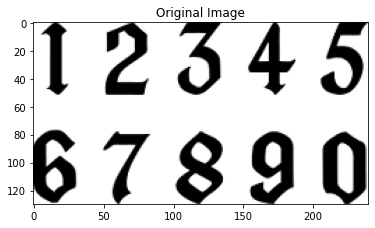

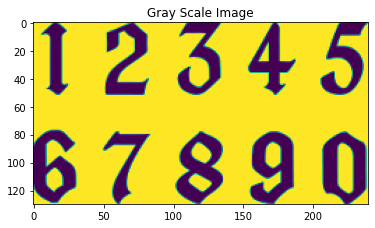

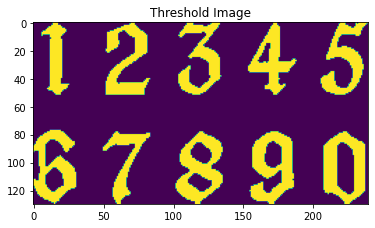

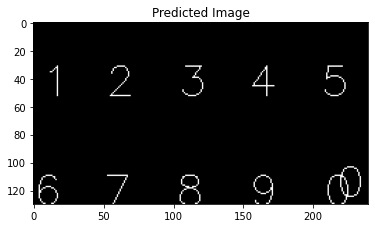

numbers.png


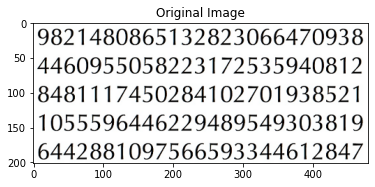

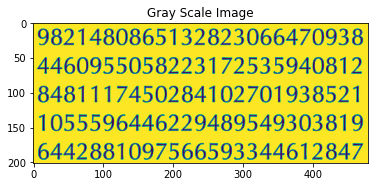

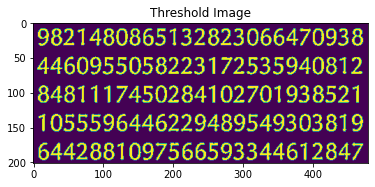

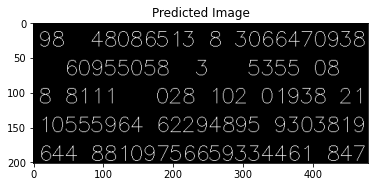

try.jpg


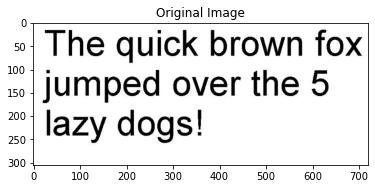

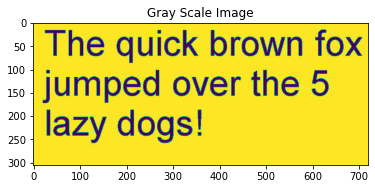

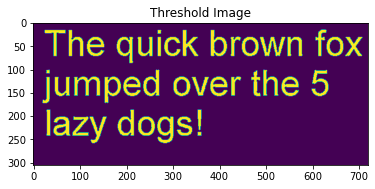

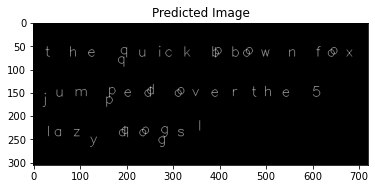

In [20]:
files=os.listdir(testing_folder)
for file in files:
    print(file)
    test_image=testing_folder+file
    identify_text(test_image)

# Conclusion

<div class="alert alert-block alert-info" > 
Since, we explored a new dimension of data creation and creating our own custom OCR to identify text using opencv, there's a scope to take it to higher level by improving the API to identify different handwritten styles and identify text. The other scope is to extract the text, as we can see, we are just identifying the text on the image, so the next enhancement can feature extraction of text and use it
